In [1]:
# Check gif

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import numpy as np
import sys
import time
import pandas as pd
import cv2
import os
import imageio
import matplotlib as mpl
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import shutil

In [20]:
def plot_gif(np_array, output_fn, sequential=False):
    
    if sequential == False:
        # If sequential is False, need to substitute worm indices into sequential for easy colouring
        ## Check the unique values in the np arrays - the original worm indices
        uniques_original = list(np.unique(np_array))[1:]  # [1:] to omit values == '0'
        print('unique_worm_ids: ', uniques_original)
        sequential_ids = range(1, len(uniques_original)+1)
        for i, original in enumerate(uniques_original):
            np_array[np_array == uniques_original[i]] = sequential_ids[i]  # Update stacked_array with sequential worm_ids
        print('sequential ids: ', list(np.unique(np_array))[1:])
    
    mpl.rcParams['image.interpolation'] = 'none'  # Prevent mpl smoothes the edges
    os.mkdir("pic_temporary")  # To temporarily store the files

    pic_list = []
    flag = 0

    np_array[:, 0:2, 0:2] = 10
    np_array[:, 528:530, 528:530] = 1
    
    for i in range(np_array.shape[0]):
        #plt.imshow(np_array[i], cmap=newcmp)
        mask = np_array[i]
        mask = np.where(mask==0, -1, mask)
        #print(np.unique(mask_1))

        value = -1
        masked_array = np.ma.masked_where(mask == value, mask)

        #cmap = mpl.cm.get_cmap("spring")
        cmap = mpl.cm.get_cmap("tab20").copy()
        cmap.set_bad(color='black')

        plt.imshow(masked_array, cmap=cmap)

        fn = 'pic_temporary/%d.jpg' % flag
        plt.savefig(fn)
        pic_list.append(fn)
        flag += 1

    with imageio.get_writer(output_fn, mode='I') as writer:
        for filename in pic_list:
            image = imageio.imread(filename)
            writer.append_data(image)

    # Remove the temporary file
    shutil.rmtree("pic_temporary")

In [ ]:
c = np.load('../22956814/D3_mask_seq_3.npy')

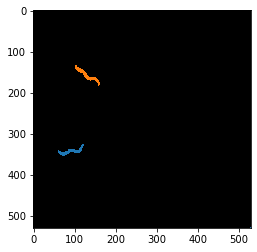

In [21]:
plot_gif(c, '../random.gif', sequential=True)

In [23]:
d = np.load('../22956814_old/D3_mask_small.npy')

unique_worm_id:  [54, 56, 2881]
sequential ids:  [0, 1, 2, 3]


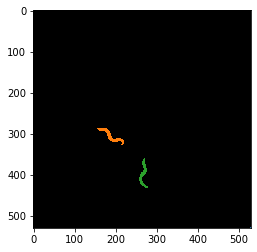

In [24]:
plot_gif(d, '../random_nonseq.gif')

unique_worm_ids:  [54, 56, 2881]
sequential ids:  [1, 2, 3]


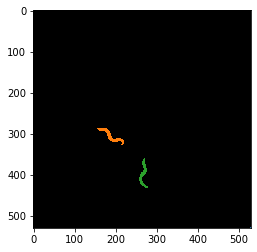

In [2]:
from gif import plot_gif
plot_gif(np.load('../22956814_old/D3_mask_small.npy'), '../rm.gif')